# Bank Data analyses CE888

In [67]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
import itertools
from sklearn import svm, datasets
from sklearn.metrics import classification_report, confusion_matrix
from scipy.stats import norm
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn import metrics, preprocessing
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectKBest, f_regression
import seaborn as sns; sns.set()
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from keras import metrics
from keras.models import Model 
from keras.layers import Input, Dense 
from keras.utils import np_utils 
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import tensorflow as tf
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
from keras import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from scipy.misc import imread
from sklearn.metrics import accuracy_score, normalized_mutual_info_score
from sklearn.metrics.cluster import completeness_score
from sklearn.metrics import pairwise_distances
from sklearn.metrics import mean_squared_error
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os
import gc
from sklearn.preprocessing import MinMaxScaler
from keras import losses
from keras.utils import to_categorical
from keras.layers import Input, Dense, Dropout
from keras.models import Model, Sequential 
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from keras import backend as K
from keras.callbacks import Callback


print("Importing Libraries is Done!!")

Importing Libraries is Done!!


In [2]:
# Load the Pandas libraries with alias 'pd' 
import pandas as pd 

# Read data from file 'filename.csv' 
dataset1 = pd.read_csv("C:\\Users\\Antri\\Desktop\\First Semester\\CE888\\Datasets\\bank-additional\\bank-additional-full.csv")

# Preview the first 5 lines of the loaded data 
dataset1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


In [3]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null int64
y                 41188 non-null object
dtypes: float64(4), int64(6), object(11)
memory usage

## Compute Missing or Null Data points

In [4]:
dataset1.isnull().sum()
dataset1.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [5]:
#check for missing variables
dataset1.isnull().any()

age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y                 False
dtype: bool

### Convert the 10 categorical variables into numeric

In [6]:
# We have 10 objects thas mean that we have some categorical features
dataset1.get_dtype_counts()

float64     4
int64       6
object     11
dtype: int64

In [7]:
#We firstly copy the y column 
ytarget=dataset1['y'].copy()
#We drop out the y attribute
Correct_set= dataset1.drop(['y'], axis=1)
Correct_set[Correct_set.select_dtypes(['object']).columns].head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent


In [8]:
Correct_set.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191


In [9]:
#We can convert now the categorical data by using dummies
Correct_set_new = pd.get_dummies(Correct_set, columns=Correct_set.select_dtypes(['object']).columns)

print("The head of the training set is:")
Correct_set_new.head()

The head of the training set is:


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191,...,0,0,0,1,0,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191,...,0,0,0,1,0,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191,...,0,0,0,1,0,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191,...,0,0,0,1,0,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191,...,0,0,0,1,0,0,0,0,1,0


In [10]:
Correct_set_new.ix[:,0:20]

C:\Users\Antri\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191,0,0,0,1,0,0,0,0,0,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191,0,0,0,0,0,0,0,1,0,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191,0,0,0,0,0,0,0,1,0,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191,1,0,0,0,0,0,0,0,0,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191,0,0,0,0,0,0,0,1,0,0
5,45,198,1,999,0,1.1,93.994,-36.4,4.857,5191,0,0,0,0,0,0,0,1,0,0
6,59,139,1,999,0,1.1,93.994,-36.4,4.857,5191,1,0,0,0,0,0,0,0,0,0
7,41,217,1,999,0,1.1,93.994,-36.4,4.857,5191,0,1,0,0,0,0,0,0,0,0
8,24,380,1,999,0,1.1,93.994,-36.4,4.857,5191,0,0,0,0,0,0,0,0,0,1
9,25,50,1,999,0,1.1,93.994,-36.4,4.857,5191,0,0,0,0,0,0,0,1,0,0


## Descriptive Statistics

In [11]:
#basic descriptive statistics
Correct_set_new.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,...,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.019010,...,0.017432,0.013839,0.190031,0.206711,0.209357,0.196416,0.197485,0.103234,0.863431,0.033335
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.178074,...,0.130877,0.116824,0.392330,0.404951,0.406855,0.397292,0.398106,0.304268,0.343396,0.179512
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4964.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Skewness of a data set

In [12]:
Correct_set_new.skew()

age                        0.784697
duration                   3.263141
campaign                   4.762507
pdays                     -4.922190
previous                   3.832042
emp.var.rate              -0.724096
cons.price.idx            -0.230888
cons.conf.idx              0.303180
euribor3m                 -0.709188
nr.employed               -1.041629
job_admin.                 1.136164
job_blue-collar            1.319373
job_entrepreneur           5.032589
job_housemaid              5.990462
job_management             3.341169
job_retired                4.581661
job_self-employed          5.101260
job_services               2.735801
job_student                6.640551
job_technician             1.817763
job_unemployed             6.135741
job_unknown               11.037621
marital_divorced           2.461128
marital_married           -0.430557
marital_single             0.975258
marital_unknown           22.624969
education_basic.4y         2.641281
education_basic.6y         3

## Data Visualizations

In [13]:
#lets get the frequency of cancer diagnosis
sns.set_style("white")
sns.set_context({"figure.figsize": (10, 8)})

C:\Users\Antri\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


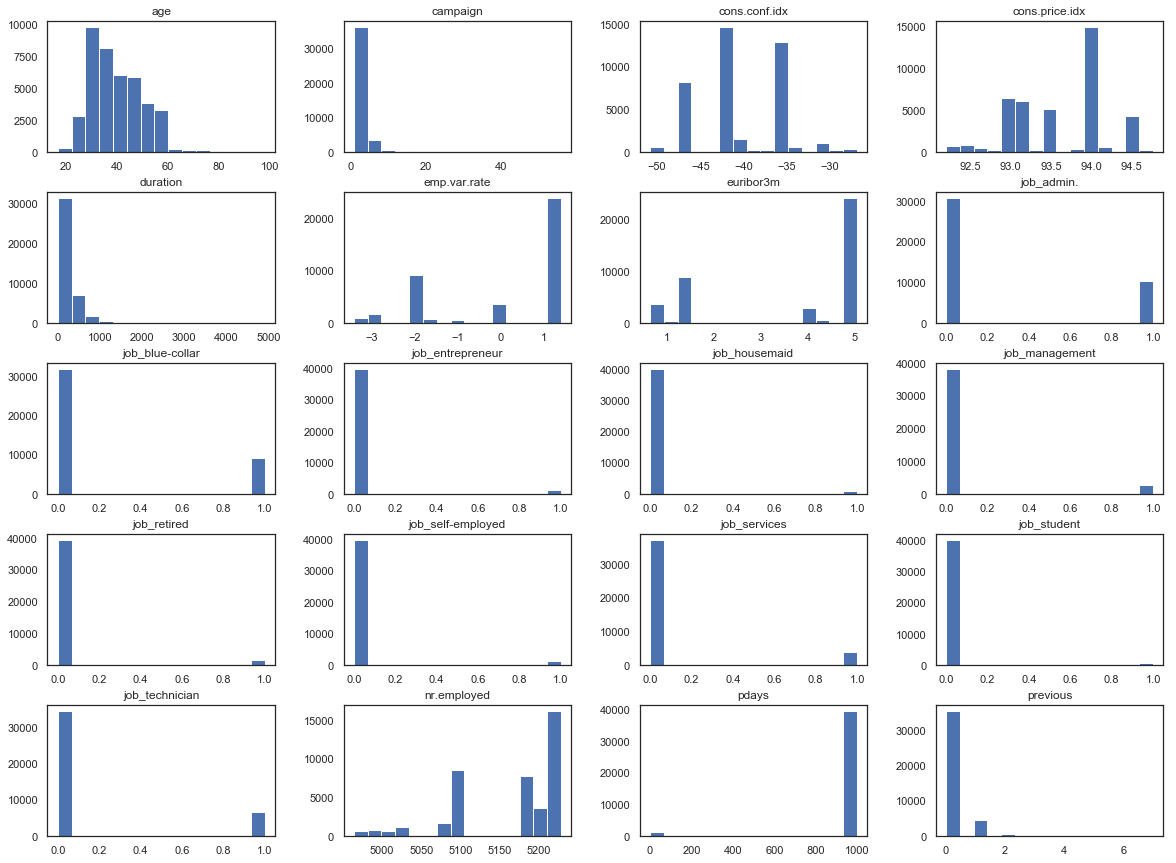

In [14]:
data_mean=Correct_set_new.ix[:,0:20]

#Plot histograms of CUT1 variables
hist_mean=data_mean.hist(bins=15, figsize=(20, 15),grid=False,)

## Visualize distribution of data via density plots

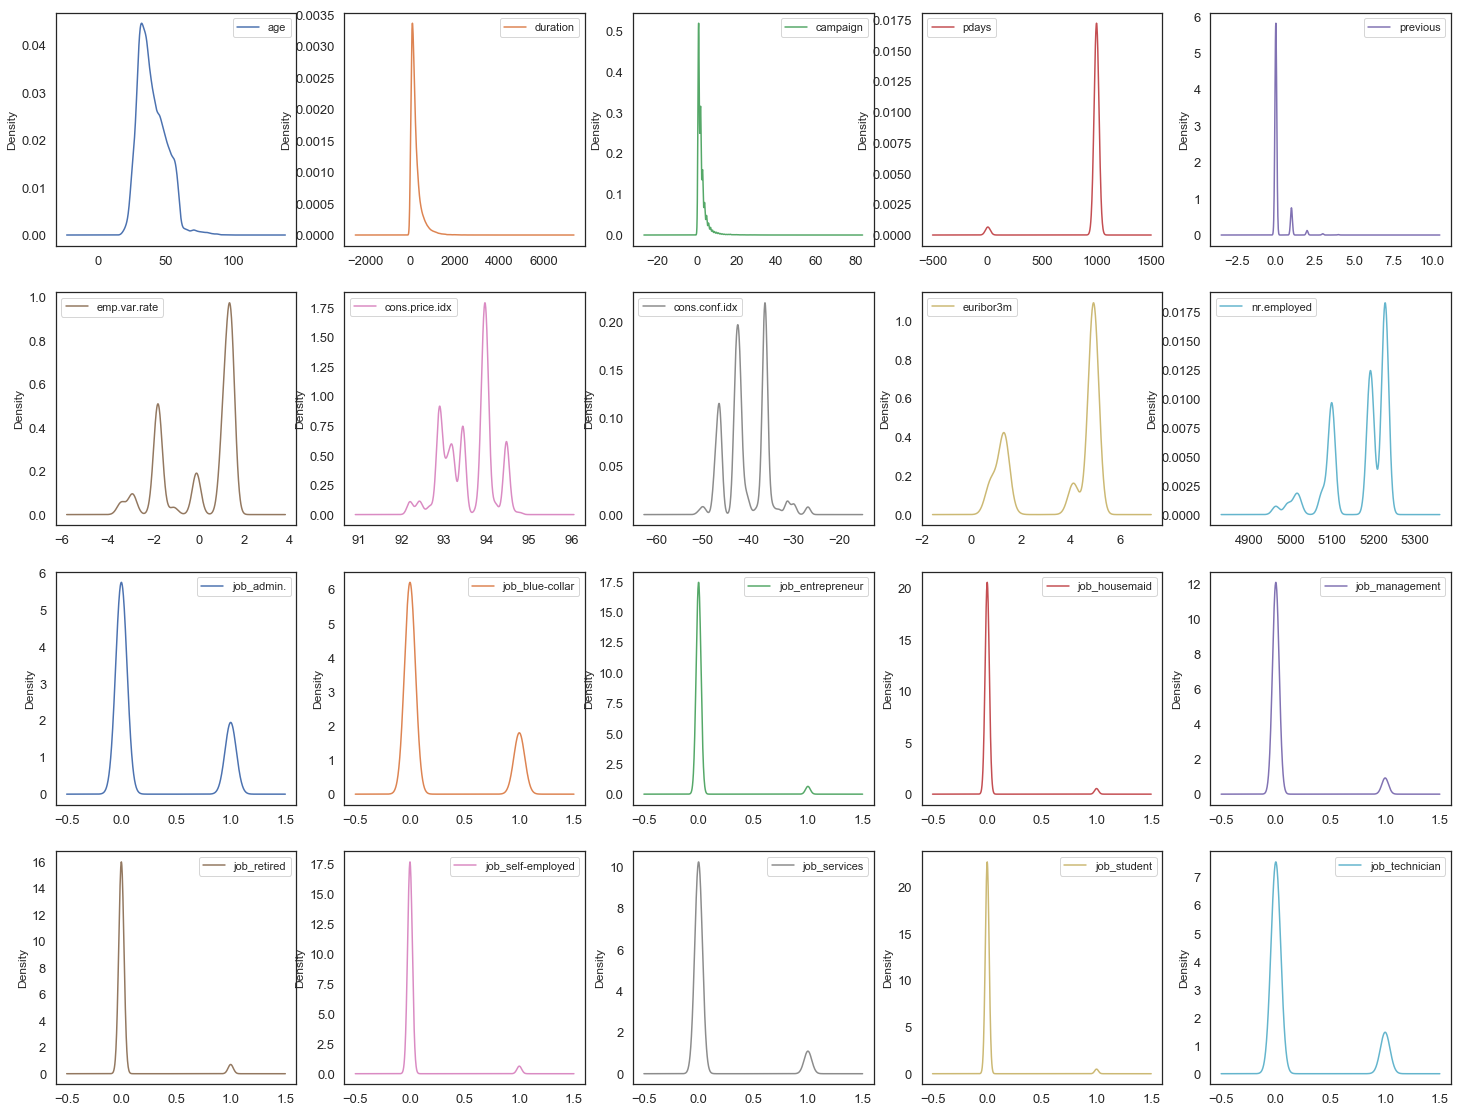

In [15]:
import matplotlib.pyplot as plt
#Density Plots
plt = data_mean.plot(kind= 'density', subplots=True, layout=(6,5), sharex=False, 
                     sharey=False,fontsize=13, figsize=(25,30))




## Visualise distribution of data via box plots

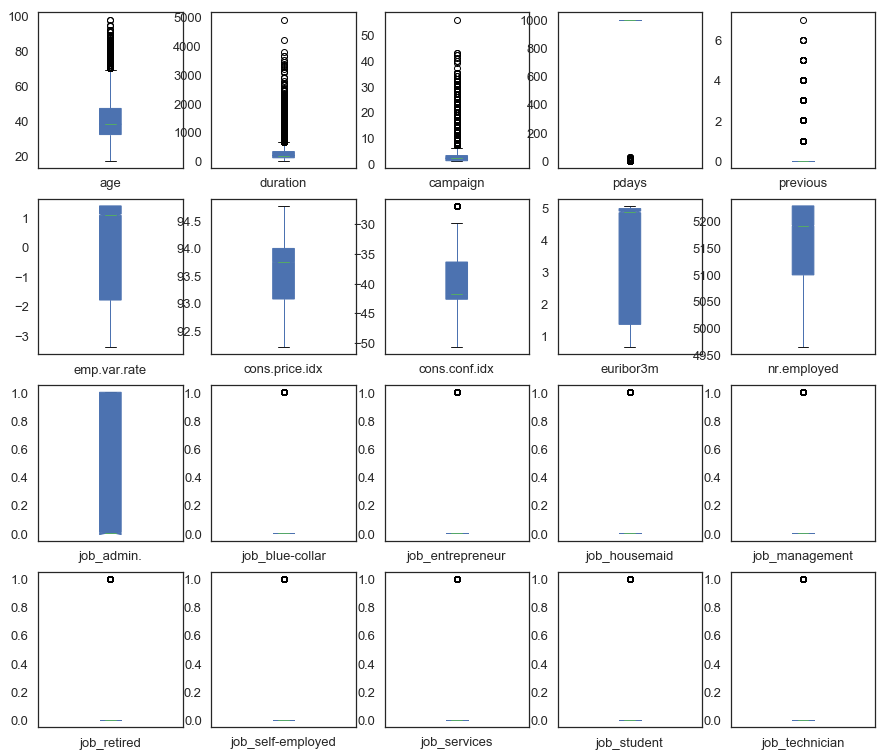

In [16]:
# box and whisker plots
plt=data_mean.plot(kind= 'box' , subplots=True, layout=(6,5), sharex=False, sharey=False,notch=True, fontsize=13, figsize=(15,20) , patch_artist=True)

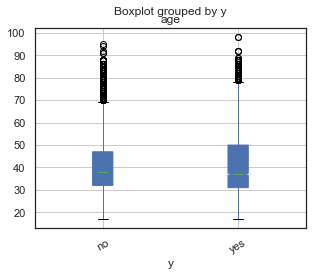

In [17]:
dataset1.boxplot('age','y',rot = 30,figsize=(4.7,3.7),notch=True , patch_artist=True)


### Left skewness Features Distribution by y='yes'

AttributeError: 'Series' object has no attribute 'show'

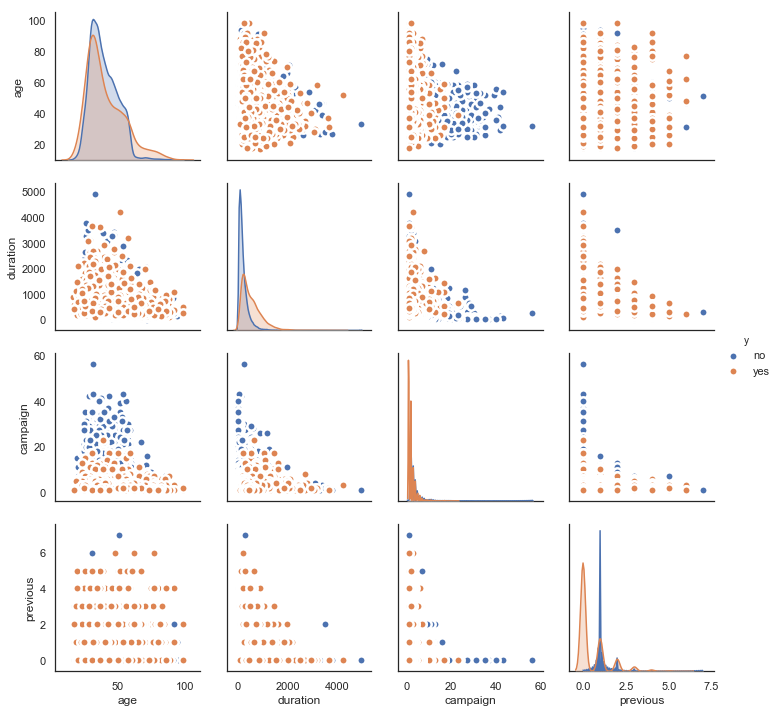

In [82]:
data = pd.read_csv("C:\\Users\\Antri\\Desktop\\First Semester\\CE888\\Datasets\\bank-additional\\bank-additional-full.csv"
, index_col=False)

data.drop('pdays', axis =1, inplace=True)
data.drop('emp.var.rate', axis =1, inplace=True)
data.drop('cons.price.idx', axis =1, inplace=True)
data.drop('cons.conf.idx', axis =1, inplace=True)
data.drop('euribor3m', axis =1, inplace=True)
data.drop('nr.employed', axis =1, inplace=True)


sns.pairplot(data, kind="scatter", hue="y", plot_kws=dict(s=70, edgecolor="white", linewidth=2.5))
plt.show()

### Multi-modal Features Distribution by y='yes'

In [ ]:
import matplotlib.pyplot as plt
data = pd.read_csv("C:\\Users\\Antri\\Desktop\\First Semester\\CE888\\Datasets\\bank-additional\\bank-additional-full.csv"
, index_col=False)

data.drop('age', axis =1, inplace=True)
data.drop('duration', axis =1, inplace=True)
data.drop('campaign', axis =1, inplace=True)
data.drop('previous', axis =1, inplace=True)

sns.pairplot(data, kind="scatter", hue="y", plot_kws=dict(s=70, edgecolor="white", linewidth=2.5))
plt.show()

## Correlation Matrix

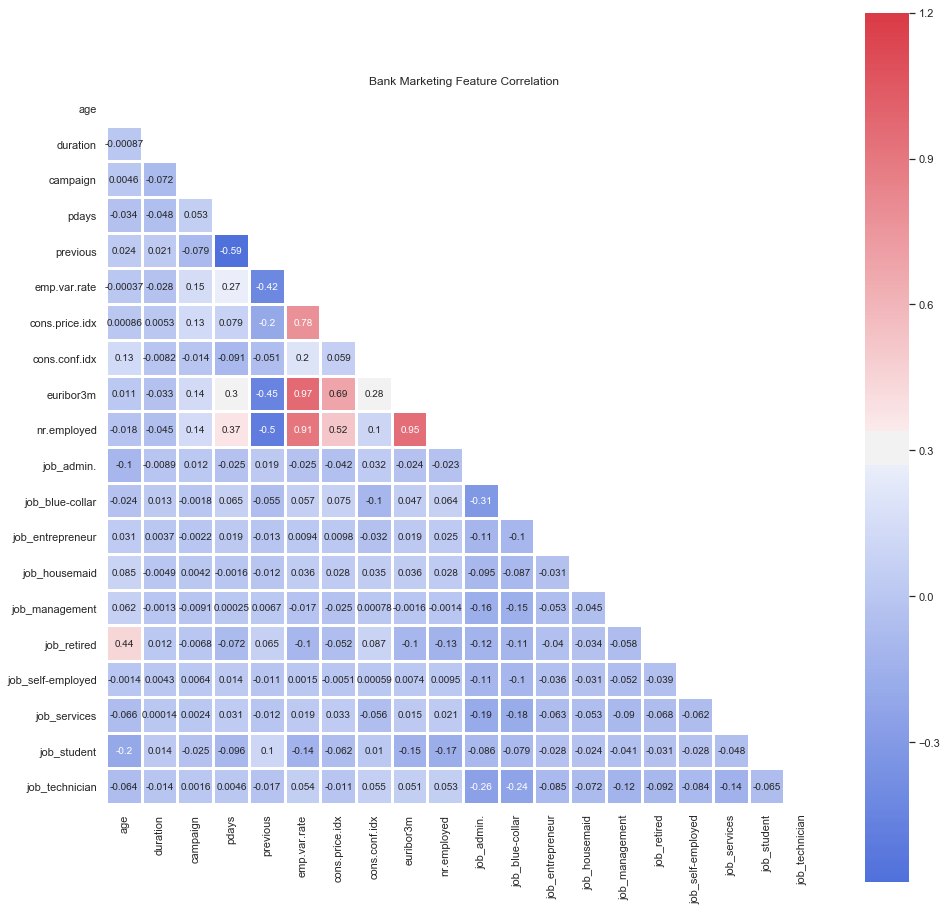

In [83]:
# plot correlation matrix
import matplotlib.pyplot as plt
plt.style.use('dark_background')
sns.set_style("white")


# Compute the correlation matrix
corr = data_mean.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
dataset1, ax = plt.subplots(figsize=(16, 16))
plt.title('Bank Marketing Feature Correlation')

# Generate a custom diverging colormap
cmap = sns.diverging_palette(260, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, vmax=1.2, square='square', cmap=cmap, mask=mask, 
            ax=ax,annot=True, fmt='.2g',linewidths=2)

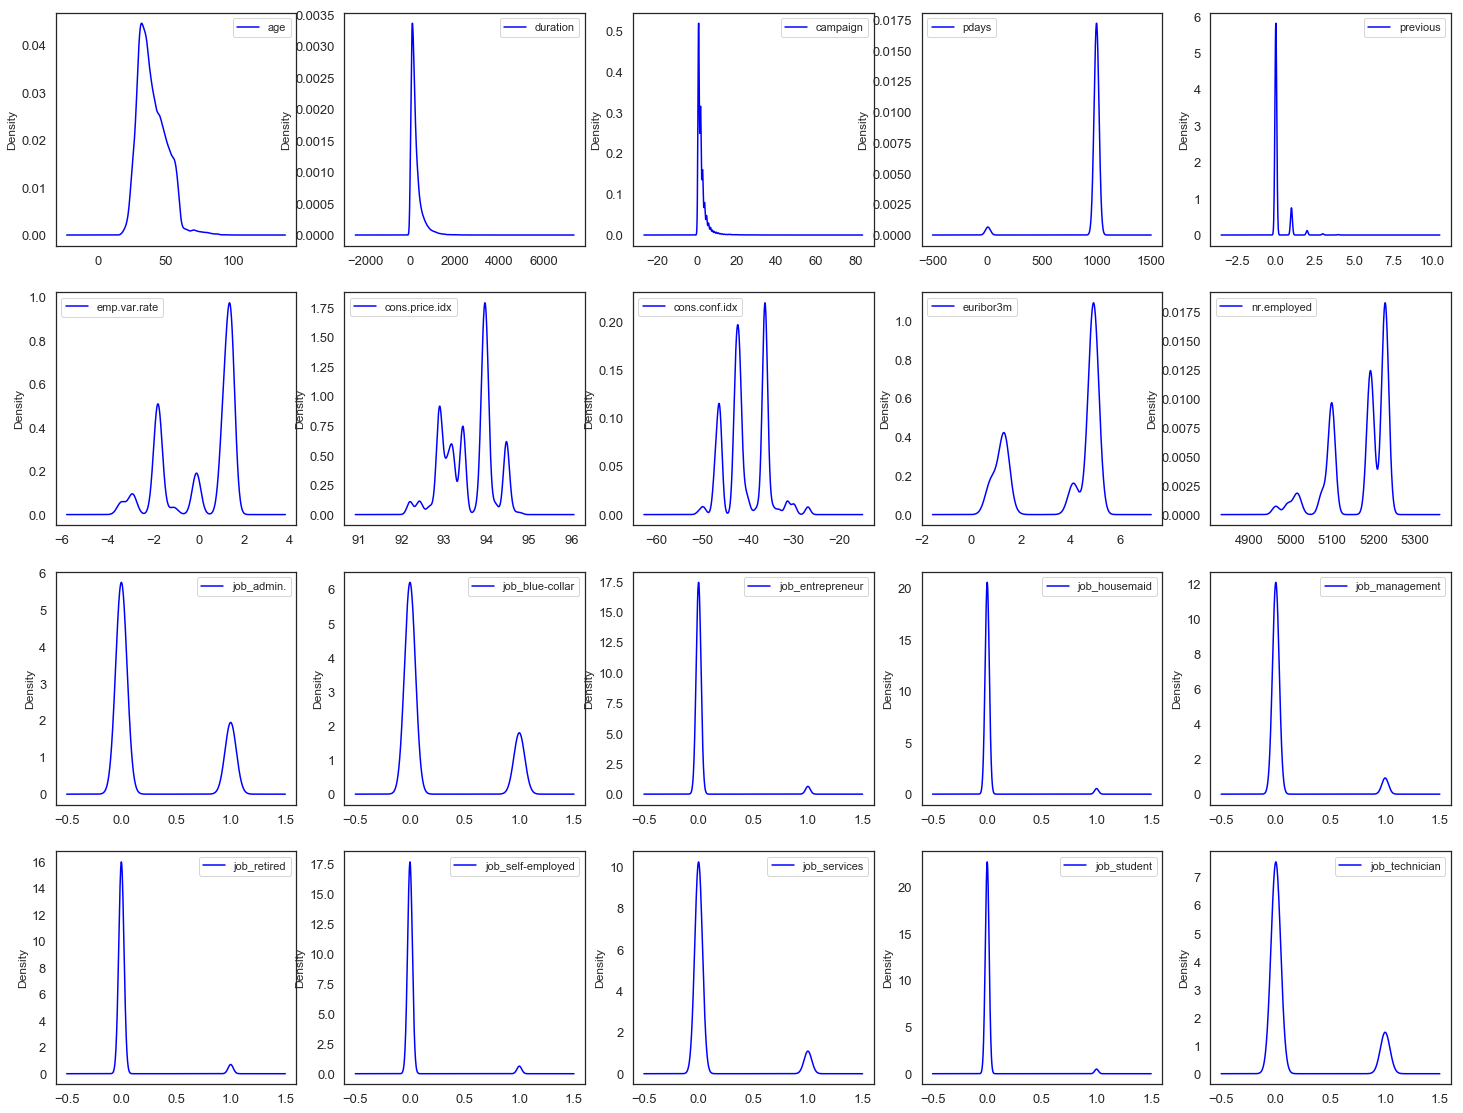

In [84]:
import matplotlib.pyplot as plt
#Density Plots
plt = data_mean.plot(kind= 'density', subplots=True, layout=(6,5), sharex=False, 
                     sharey=False,fontsize=13, figsize=(25,30),color='blue')

## K-means Clustering Algorithm

### The code of K-means clustering algorithm is based on the following source:
https://www.datacamp.com/community/tutorials/k-means-clustering-python

### Split the dataset into training and validation data set

In [18]:
#We firstly copy the y column 
ytarget=dataset1['y'].copy()
#We drop out the y attribute
Training_set= dataset1.drop(['y'], axis=1)

Training_set[Training_set.select_dtypes(['object']).columns].head()

#We can convert now the categorical data by using dummies
Training_set_new = pd.get_dummies(Training_set, columns=Training_set.select_dtypes(['object']).columns)
Training_set_new.select_dtypes(['object']).columns

ytarget.value_counts()
y = ytarget.map({"yes":1, "no":0})


In [19]:
X_train, X_test, y_train, y_test = train_test_split( Training_set_new, y, test_size = 0.20, random_state = 100)

print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(32950, 63) (32950,)
(8238, 63) (8238,)


# Build K-means algorithm

##### We use the elbow method to pick the optimum amount of clusters
The code of Elbow method is based on the following source:
https://www.kaggle.com/tonzowonzo/simple-k-means-clustering-on-the-iris-dataset


##### Find the most optimum k for clustering according to Accuracy score

In [21]:
acc_optimum = [0 for i in range(11)]

x = np.concatenate((X_train, X_test))
y = np.concatenate((y_train, y_test))


for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init ='k-means++', max_iter = 300, n_init = 10, random_state = 0)
    # Train K-Means.
    y_pred_kmeans = kmeans.fit_predict(x)
    acc_optimum[i]=accuracy_score(y,y_pred_kmeans)*100
    print( i ,"Mean cluster accuracy score is:",'%.2f' % acc_optimum[i] )
    
    

2 Mean cluster accuracy score is: 13.19
3 Mean cluster accuracy score is: 85.06
4 Mean cluster accuracy score is: 19.20
5 Mean cluster accuracy score is: 6.73
6 Mean cluster accuracy score is: 8.29
7 Mean cluster accuracy score is: 21.16
8 Mean cluster accuracy score is: 39.06
9 Mean cluster accuracy score is: 16.60
10 Mean cluster accuracy score is: 22.01


###### According to the above result the 3-mean clustering give us the best accuracy score 

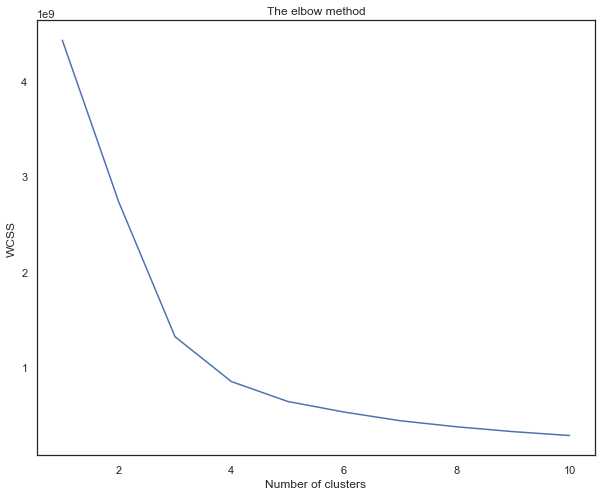

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()


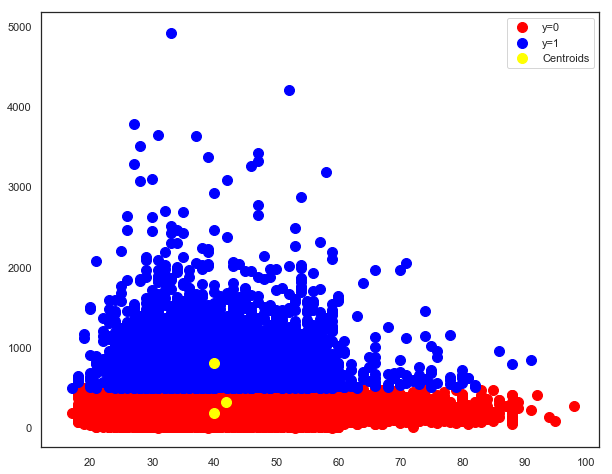

In [22]:
#Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)
#Visualising the clusters
import numpy as np
import matplotlib.pyplot as plt
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'y=0')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'y=1')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

### Evaluation Metrics of K-Means algorithm before autoencoder

In [24]:
#Accuracy score
print( "\nThe best k Mean accuracy score is:", accuracy_score(y,y_kmeans)*100)


The best k Mean accuracy score is: 85.06361076041566


In [25]:
#Confusion Matrix
print("The confusion matrix of K-Mean Algorithm is:\n", confusion_matrix(y, y_kmeans))

The confusion matrix of K-Mean Algorithm is:
 [[33109  2893   546]
 [ 1750  1927   963]
 [    0     0     0]]


In [26]:
#Normalized mutual score
print("Normalized mutual score is:",normalized_mutual_info_score(y, y_kmeans))

Normalized mutual score is: 0.19003105240181592


C:\Users\Antri\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


#### Completeness metric
Completeness metric of a cluster labeling given a ground truth.
A clustering result satisfies completeness if all the data points that are members of a given class are elements of the same cluster.
This metric is independent of the absolute values of the labels: a permutation of the class or cluster label values won’t change the score value in any way.

In [27]:
#Completeness Score
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.completeness_score.html#sklearn.metrics.completeness_score

print("Completeness score is:",completeness_score(y, y_kmeans))

Completeness score is: 0.15735572301055079


In [29]:
# Mean Square Error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y, y_kmeans)
print("MSE is:", mse)

MSE is: 0.18913275711372243


## Design Auto Encoder

### Change the middle layer to use softmax features

In [55]:
#Import Libraries
from keras.datasets import mnist 
from keras.models import Model 
from keras.layers import Input, Dense 
from keras.utils import np_utils 
import numpy as np
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape
from keras import regularizers
import tensorflow as tf
from keras import metrics

In [56]:
#We firstly copy the y column 
ytarget=dataset1['y'].copy()
#We drop out the y attribute
Training_set= dataset1.drop(['y'], axis=1)

Training_set[Training_set.select_dtypes(['object']).columns].head()

#We can convert now the categorical data by using dummies
Training_set_new = pd.get_dummies(Training_set, columns=Training_set.select_dtypes(['object']).columns)
Training_set_new.select_dtypes(['object']).columns

ytarget.value_counts()
y = ytarget.map({"yes":1, "no":0})

X_train, X_test, y_train, y_test = train_test_split( Training_set_new, y, test_size = 0.20, random_state = 100)

print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(32950, 63) (32950,)
(8238, 63) (8238,)


In [59]:
#The autoencoder code is based on the following source:
#https://github.com/rjpg/bftensor/blob/349f0c3aad5e2768e94f4f7b741f5f7ff4328d64/Autoencoder/src/AutoEncoderMNIST.py


num_train = 32950
num_test = 8238

height, width, depth = 1, 63, 1 # MNIST images are 1x63
num_classes = 10

X_train = X_train.astype('float32') 
X_test = X_test.astype('float32')

X_train /= 255 # Normalise data to [0, 1] range
X_test /= 255 # Normalise data to [0, 1] range

Y_train = np_utils.to_categorical(y_train, num_classes) # One-hot encode the labels
Y_test = np_utils.to_categorical(y_test, num_classes) # One-hot encode the labels


In [60]:
#Build the Autoencoder
input_img = Input(shape=(height * width,))

x = Dense(height * width, activation='relu')(input_img)

encoded = Dense(height * width//2, activation='relu' ,activity_regularizer=regularizers.l1(10e-5))(x)
encoded = Dense(height * width//8, activation='relu')(encoded)

y = Dense(height * width, activation='relu')(x)

decoded = Dense(height * width//8, activation='relu')(y)
decoded = Dense(height * width//2, activation='relu')(decoded)

z = Dense(height * width, activation='sigmoid')(decoded)
model = Model(input_img, z)

In [61]:

model.compile(optimizer='adadelta', loss='mse') # reporting the accuracy

#Normalizing the data
from keras import regularizers
from sklearn import preprocessing
X_train = pd.DataFrame(X_train)#.values)
X_train = preprocessing.MinMaxScaler().fit_transform(X_train.values)


model.fit(X_train, X_train,
      epochs=10,
      batch_size=128,
      shuffle=True,
      validation_data=(X_test, X_test))


Train on 32950 samples, validate on 8238 samples
Epoch 1/10
32950/32950 [==============================] - 2s 52us/step - loss: 0.1160 - val_loss: 0.1812
Epoch 2/10
32950/32950 [==============================] - 1s 26us/step - loss: 0.0904 - val_loss: 0.1767
Epoch 3/10
32950/32950 [==============================] - 1s 36us/step - loss: 0.0844 - val_loss: 0.1755
Epoch 4/10
32950/32950 [==============================] - 1s 34us/step - loss: 0.0823 - val_loss: 0.1741
Epoch 5/10
32950/32950 [==============================] - 1s 28us/step - loss: 0.0809 - val_loss: 0.1735
Epoch 6/10
32950/32950 [==============================] - 1s 28us/step - loss: 0.0790 - val_loss: 0.1719
Epoch 7/10
32950/32950 [==============================] - 1s 26us/step - loss: 0.0757 - val_loss: 0.1686
Epoch 8/10
32950/32950 [==============================] - 1s 43us/step - loss: 0.0728 - val_loss: 0.1670
Epoch 9/10
32950/32950 [==============================] - 2s 46us/step - loss: 0.0713 - val_loss: 0.1659
Epoch 

In [62]:
out = Dense(num_classes, activation='softmax')(y)
reduced = Model(input_img, out)
reduced.compile(loss='categorical_crossentropy',
          optimizer='adam', 
          metrics=['accuracy']) 

reduced.fit(X_train, Y_train,
      epochs=10,
      batch_size=128,
      shuffle=True,
      validation_data=(X_test, Y_test))

scores = reduced.evaluate(X_test, Y_test, verbose=1) 


Train on 32950 samples, validate on 8238 samples
Epoch 1/10
32950/32950 [==============================] - 2s 46us/step - loss: 0.3853 - acc: 0.8718 - val_loss: 1.5351 - val_acc: 0.8946
Epoch 2/10
32950/32950 [==============================] - 1s 24us/step - loss: 0.2490 - acc: 0.9007 - val_loss: 1.4353 - val_acc: 0.8965
Epoch 3/10
32950/32950 [==============================] - 1s 39us/step - loss: 0.2185 - acc: 0.9077 - val_loss: 1.3466 - val_acc: 0.8958
Epoch 4/10
32950/32950 [==============================] - 1s 44us/step - loss: 0.2085 - acc: 0.9086 - val_loss: 1.3759 - val_acc: 0.8661
Epoch 5/10
32950/32950 [==============================] - 1s 38us/step - loss: 0.2001 - acc: 0.9120 - val_loss: 1.3692 - val_acc: 0.8330
Epoch 6/10
32950/32950 [==============================] - 1s 24us/step - loss: 0.1970 - acc: 0.9131 - val_loss: 1.3181 - val_acc: 0.8949
Epoch 7/10
32950/32950 [==============================] - 1s 42us/step - loss: 0.1918 - acc: 0.9126 - val_loss: 1.3291 - val_acc:

In [64]:
x = np.concatenate((X_train, X_test))
y = np.concatenate((Y_train, Y_test))

kmeans = KMeans(n_clusters=2, n_init=20, n_jobs=4)
# Train K-Means.
y_pred_kmeans = kmeans.fit_predict(x)
print("\nThe K Mean cluster accuracy score using autoencoder(softmax) is: ", scores[1]*100)
#Normalized mutual score
#print("Normalized mutual score is:",normalized_mutual_info_score(y, y_kmeans))
#print("Completeness score is:",completeness_score(y, y_kmeans))
#mse = mean_squared_error(y, y_kmeans)
#print("MSE is:", mse)


The K Mean cluster accuracy score using autoencoder(softmax) is:  87.94610341881976
